In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [10]:
###Data Import

leek_data_all = pd.read_excel('AFL Leek Growth Data.xlsx', sheet_name='growth')


In [11]:
###Filter Data

method_filtered_df = leek_data_all[leek_data_all['method'].str.contains(input("Which method? "))]

method_variety_filtered_df = method_filtered_df[method_filtered_df['variety'].str.contains(input("Which variety? "))]

filtered_leek_data = method_variety_filtered_df[method_variety_filtered_df['inputs'].str.contains(input("Which inputs? "))]

print(filtered_leek_data)

Which method? Drilled
Which variety? Krypton
Which inputs? Conventional
      sample_date         field  zone  variety  diameter  count  \
48     2019-07-18      Allans 7     1  Krypton       8.0   45.5   
49     2019-07-18      Allans 7     1  Krypton       7.2   45.5   
50     2019-07-18      Allans 7     1  Krypton       7.3   45.5   
51     2019-07-18      Allans 7     1  Krypton       9.0   45.5   
52     2019-07-18      Allans 7     1  Krypton       6.2   45.5   
...           ...           ...   ...      ...       ...    ...   
47356  2020-10-16  Park Farm 68     4  Krypton      31.0   45.0   
47357  2020-10-16  Park Farm 68     4  Krypton      11.0   45.0   
47358  2020-10-16  Park Farm 68     4  Krypton      38.0   45.0   
47359  2020-10-16  Park Farm 68     4  Krypton      30.0   45.0   
47360  2020-10-16  Park Farm 68     4  Krypton      36.0   45.0   

       standard_deviation planting_date   method        inputs protection  \
48                   0.00    2019-04-01  Drill

In [12]:
###Growth Model Creation###
x = filtered_leek_data[['count','particle_size','organic_matter','diameter^0.625','solar_radiation','standard_deviation','pest_damage']]
y = filtered_leek_data[['heat_units']]
x = sm.add_constant(x)
leek_model = sm.OLS(y,x).fit()
model_summary = leek_model.summary()
print(model_summary)
model_fitted_y = leek_model.fittedvalues
model_residuals = leek_model.resid

                            OLS Regression Results                            
Dep. Variable:             heat_units   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.208e+04
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:13:59   Log-Likelihood:                -40076.
No. Observations:                6562   AIC:                         8.017e+04
Df Residuals:                    6554   BIC:                         8.022e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -32.6126     20

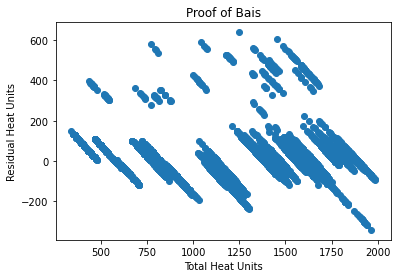

In [13]:
###Bias Graph###
plt.scatter(model_fitted_y,model_residuals)
plt.title('Proof of Bais')
plt.xlabel(r'Total Heat Units')
plt.ylabel(r'Residual Heat Units')
plt.show()

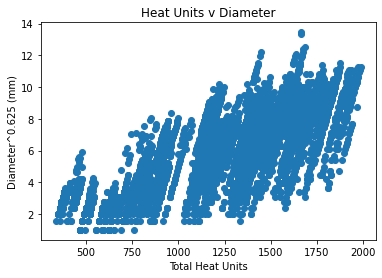

In [14]:
###Correlation Graphs###
###Diameter###
plt.scatter(model_fitted_y,filtered_leek_data[['diameter^0.625']])
plt.title(r'Heat Units v Diameter')
plt.xlabel(r'Total Heat Units')
plt.ylabel(r'Diameter^0.625 (mm)')
plt.show()

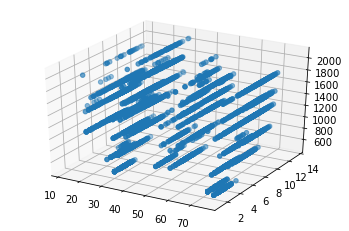

In [15]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(filtered_leek_data['organic_matter'], filtered_leek_data['diameter^0.625'], filtered_leek_data['heat_units'],cmap='hsv')
plt.show()

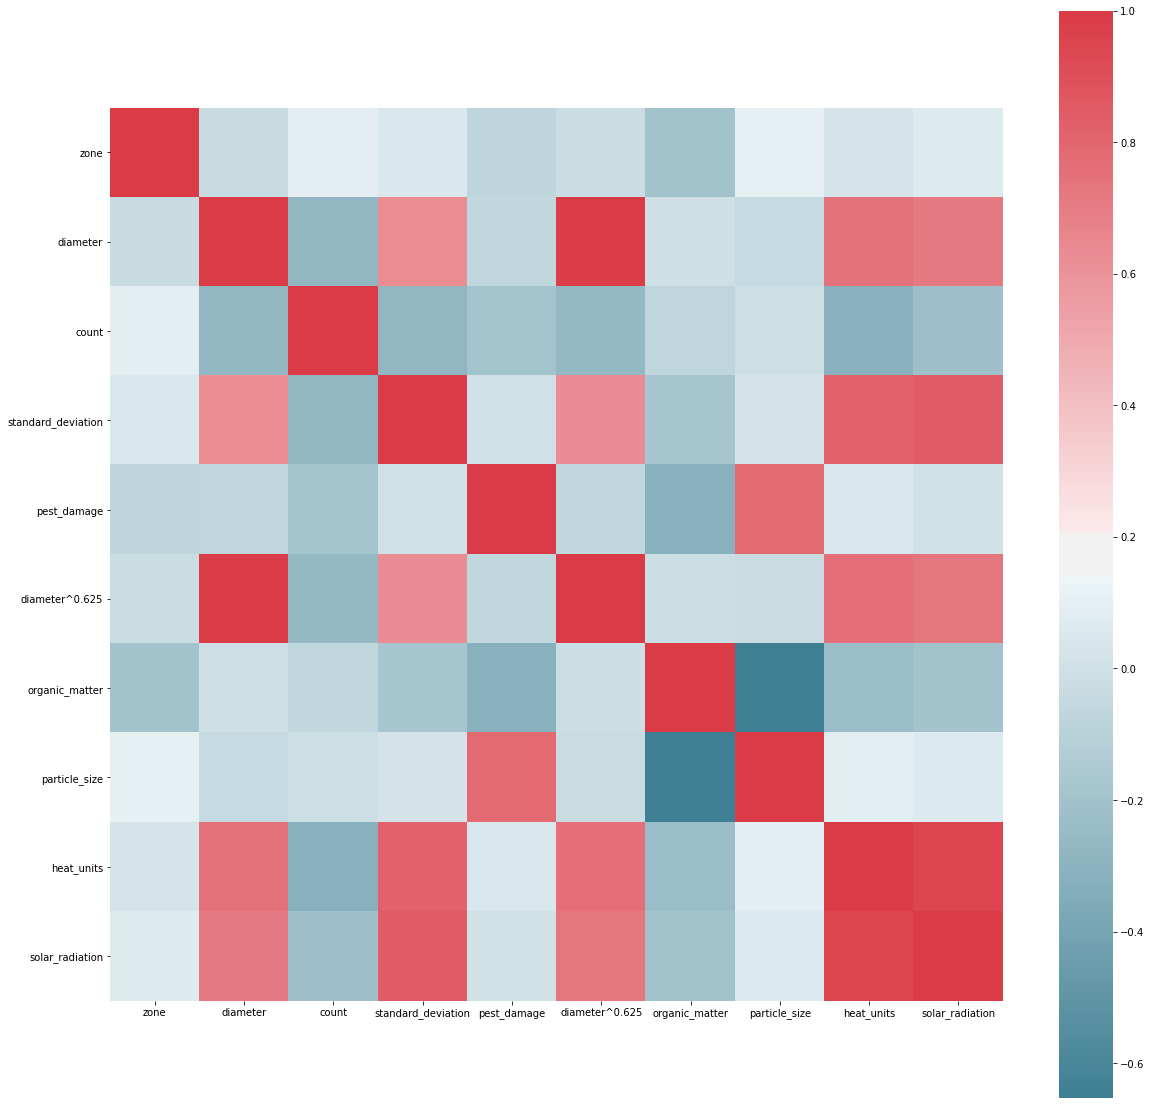

In [16]:
f,ax = plt.subplots(figsize=(20, 20))
corr = filtered_leek_data.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool),
           cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)
plt.show()